# A Mecânica da Projeção no PCA

Como vimos, o PCA busca o eixo que melhor representa a variação dos nossos dados. Mas o que significa "projetar" os dados nesse novo eixo?

Neste exemplo sintético bidimensional, vamos visualizar exatamente como a transformação geométrica ocorre. Imagine que cada ponto da nossa nuvem original "cai" perpendicularmente (em um ângulo de 90 graus) em direção à linha do **1º Componente Principal ($PC_1$)**. O local onde o ponto aterrissa na linha se torna a sua nova coordenada.

No gráfico ao lado, mostramos o resultado final dessa compressão: os pontos deixam de precisar de duas coordenadas (X e Y) e passam a viver em um espaço unidimensional, apenas ao longo da reta do $PC_1$.

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA

# --- CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Tipografia e Tamanhos Otimizados para PDF
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

# Aplicação do Tema Base
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Garantia de renderização de fontes e glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

## Geração dos Dados e Cálculo da Projeção

Para que possamos enxergar cada projeção individualmente de forma clara, vamos gerar uma pequena quantidade de dados sintéticos (apenas 15 pontos) com uma forte correlação linear.

In [11]:
# Fixando a semente para garantir a reprodutibilidade do material didático
np.random.seed(28)

# Gerando 15 pontos esparsos e correlacionados
x_orig = np.linspace(-4, 4, 15)
y_orig = 1.2 * x_orig + np.random.randn(15) * 1.5
dados = np.vstack((x_orig, y_orig)).T

# Aplicação do PCA
pca = PCA(n_components=1)
pca.fit(dados)

# O 1º Componente Principal (vetor diretor) e a média (origem do eixo)
v1 = pca.components_[0]
media = pca.mean_

# Calculando as projeções exatas de cada ponto na reta do PC1
dados_centralizados = dados - media
coordenadas_projetadas = np.dot(dados_centralizados, v1)
pontos_projetados = media + coordenadas_projetadas[:, np.newaxis] * v1

# Para desenhar a linha do PC1 cruzando TODA a variância (incluindo o último ponto)
# Pegamos a menor e a maior coordenada projetada e adicionamos uma margem de "respiro" (+1 e -1)
t_min = np.min(coordenadas_projetadas) - 1.5
t_max = np.max(coordenadas_projetadas) + 1.5
t = np.linspace(t_min, t_max, 100)
linha_pc1 = media + t[:, np.newaxis] * v1

## Visualização: De 2D para 1D

Abaixo:
- **(a)** O espaço bidimensional original. Os pontos azuis são os dados reais. A reta vermelha é o $PC_1$. As linhas pontilhadas mostram o "caminho" que cada ponto faz ao ser projetado ortogonalmente (a 90 graus) na reta.
- **(b)** O espaço transformado unidimensional. Os dados agora foram comprimidos e alinhados perfeitamente no novo eixo.

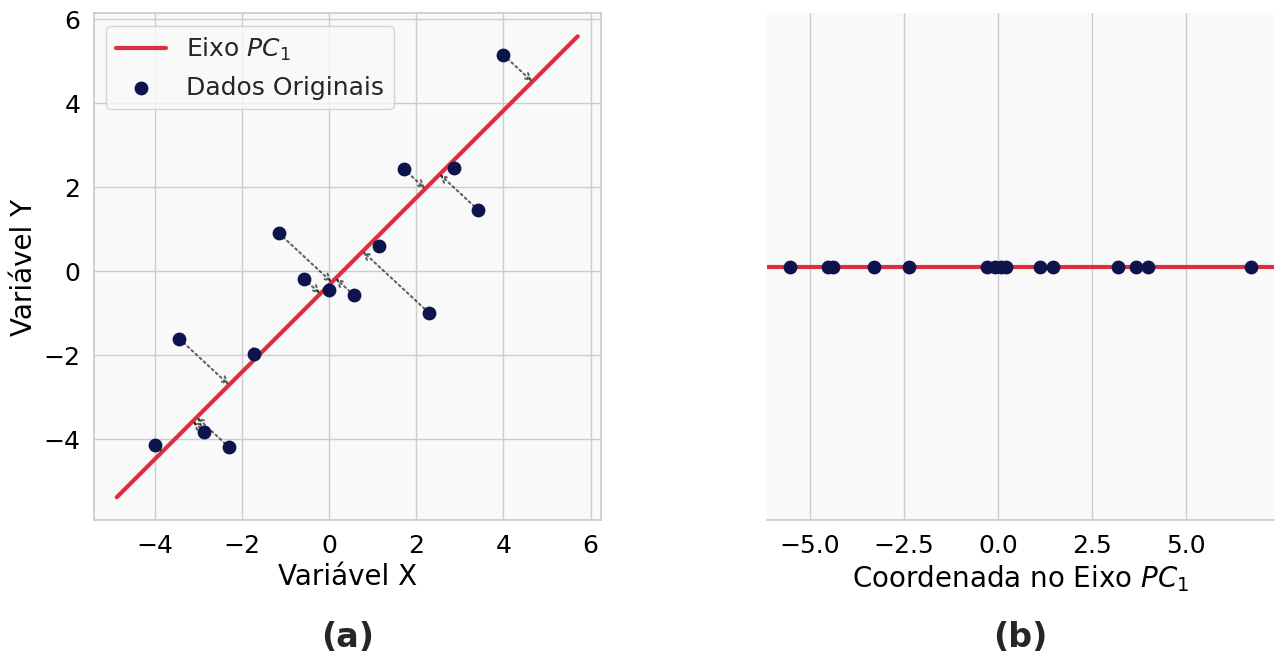

In [12]:
# Inicializando a figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# ---------------------------------------------------------
# Plot (a): Nuvem 2D e Projeção Ortogonal no PC1
# ---------------------------------------------------------
# Reta do PC1 (Agora cruza toda a nuvem)
ax1.plot(linha_pc1[:, 0], linha_pc1[:, 1], color=COR_VERMELHO, linewidth=3, label=r'Eixo $PC_1$')

# Desenhando as linhas de projeção COM setas (terminações no eixo)
for i in range(len(dados)):
    ax1.annotate('', 
                 xy=(pontos_projetados[i, 0], pontos_projetados[i, 1]), # Destino (na reta)
                 xytext=(dados[i, 0], dados[i, 1]),                     # Origem (no ponto)
                 arrowprops=dict(arrowstyle='->', color=COR_PRETO, linestyle=':', linewidth=1.5, alpha=0.6, shrinkA=0, shrinkB=0))

# Apenas os pontos originais
ax1.scatter(dados[:, 0], dados[:, 1], color=COR_AZUL_PRINCIPAL, s=80, label='Dados Originais', zorder=5)

ax1.set_xlabel('Variável X', fontsize=FONT_LABEL, color=COR_PRETO)
ax1.set_ylabel('Variável Y', fontsize=FONT_LABEL, color=COR_PRETO)
ax1.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)
ax1.legend(fontsize=FONT_TICK, loc='upper left')
ax1.set_box_aspect(1)

# Letra (a)
ax1.text(0.5, -0.25, '(a)', transform=ax1.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE)


# ---------------------------------------------------------
# Plot (b): Os dados transformados e alinhados (1D)
# ---------------------------------------------------------
# Pontos projetados agora na cor AZUL, mantendo a identidade visual da origem dos dados
ax2.scatter(coordenadas_projetadas, np.zeros_like(coordenadas_projetadas), 
            color=COR_AZUL_PRINCIPAL, s=80, zorder=5)

# Linha horizontal representando o eixo 1D (PC1 em vermelho)
ax2.axhline(0, color=COR_VERMELHO, linewidth=3)

# Escondendo o eixo Y, pois ele não existe mais nesse espaço comprimido
ax2.get_yaxis().set_visible(False)
# Removendo a borda de cima, esquerda e direita para enfatizar o aspecto 1D
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlabel(r'Coordenada no Eixo $PC_1$', fontsize=FONT_LABEL, color=COR_PRETO)
ax2.tick_params(axis='x', labelsize=FONT_TICK, colors=COR_PRETO)
ax2.set_box_aspect(1)

# Letra (b)
ax2.text(0.5, -0.25, '(b)', transform=ax2.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE)


# ---------------------------------------------------------
# Ajustes Finais e Exportação
# ---------------------------------------------------------
plt.tight_layout(w_pad=4.0)
fig.subplots_adjust(bottom=0.25)

# Salvamento na pasta correspondente
caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_05')
os.makedirs(caminho_save, exist_ok=True)

# Exportação em Alta Resolução
plt.savefig(os.path.join(caminho_save, '04_projecao_ortogonal_pca.png'), 
            dpi=300, bbox_inches='tight', pad_inches=0.4)

plt.show()